In [127]:
from collections import defaultdict
import sys
import os
os.chdir('C:\\Users\\M246047\\Documents\\Python')
import numpy as np
import pandas as pd
import datetime as dt
from collections import defaultdict
import sys
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime


infile = '20190926_DA_16.02_server.log.2'

In [128]:
# capture the logon/logoff data
D = defaultdict(list)
with open(infile, 'r') as f:
    for line in f:
        if 'Web session' in line:
            T = line.split(' ')
            D[T[0]].append((T[1], T[8], T[7]))

In [129]:
# look over the data
for day in sorted(D):
    print('_' * 20,  day,  '_'  * 20)
    for T in D[day]:
        print('T')
    print

____________________ 2019-08-15 ____________________
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
____________________ 2019-08-16 ____________________
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
____________________ 2019-08-17 ____________________
T
T
T
T
T
T
T
T
____________________ 2019-08-19 ____________________
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
____________________ 2019-08-20 ____________________
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
____________________ 2019-08-21 ____________________
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
____________________ 2019-08-22 ____________________
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
____________________ 2019-08-23 ____________________
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
T
______________

In [130]:
# determine the maximum number of concurrent users per day
date = []
users = []    

for day in sorted(D):
    userL = []
    lenL = []
    date.append(day)
    for T in D[day]:
        if T[2] == 'started:':
            userL.append(T[1])
        elif T[1] in userL:
            userL.remove(T[1])
        lenL.append(len(userL))
    users.append(max(lenL))
    print(day + '\t' + str(max(lenL)))

df = {'Date':date, 'Users':users} 
users_df = pd.DataFrame(df)


print('users_df: \n', users_df)

2019-08-15	20
2019-08-16	15
2019-08-17	0
2019-08-19	14
2019-08-20	24
2019-08-21	28
2019-08-22	15
2019-08-23	19
2019-08-24	6
2019-08-25	1
2019-08-26	17
2019-08-27	12
2019-08-28	18
2019-08-29	7
2019-08-30	15
2019-08-31	1
2019-09-01	2
2019-09-02	22
2019-09-03	11
2019-09-04	21
2019-09-05	24
2019-09-06	29
2019-09-07	0
2019-09-09	16
2019-09-10	16
2019-09-11	20
2019-09-12	17
users_df: 
           Date  Users
0   2019-08-15     20
1   2019-08-16     15
2   2019-08-17      0
3   2019-08-19     14
4   2019-08-20     24
5   2019-08-21     28
6   2019-08-22     15
7   2019-08-23     19
8   2019-08-24      6
9   2019-08-25      1
10  2019-08-26     17
11  2019-08-27     12
12  2019-08-28     18
13  2019-08-29      7
14  2019-08-30     15
15  2019-08-31      1
16  2019-09-01      2
17  2019-09-02     22
18  2019-09-03     11
19  2019-09-04     21
20  2019-09-05     24
21  2019-09-06     29
22  2019-09-07      0
23  2019-09-09     16
24  2019-09-10     16
25  2019-09-11     20
26  2019-09-12     17


In [131]:
# users_df['Date'] = pd.to_datetime(users_df['Date'])
users_df.info()

# Adding a day of week column
users_df['Day'] = pd.DatetimeIndex(users_df['Date']).weekday_name
# for i, row in users_df.iterrows():
#     date = users_df.iloc[i]['Date']
#     day = datetime.datetime.strptime(date, '%Y-%m-%d').strftime('%A')
#     users_df[row, 'Day'] = day
users_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
Date     27 non-null object
Users    27 non-null int64
dtypes: int64(1), object(1)
memory usage: 364.0+ bytes


,Date,Users,Day
0,2019-08-15,20,Thursday
1,2019-08-16,15,Friday
2,2019-08-17,0,Saturday
3,2019-08-19,14,Monday
4,2019-08-20,24,Tuesday
5,2019-08-21,28,Wednesday
6,2019-08-22,15,Thursday
7,2019-08-23,19,Friday
8,2019-08-24,6,Saturday
9,2019-08-25,1,Sunday


<class 'str'>


<BarContainer object of 27 artists>

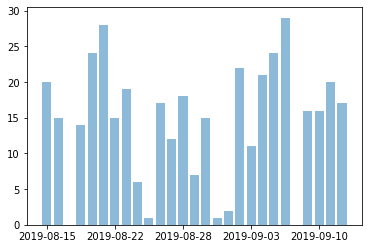

In [133]:

print(type(users_df.iloc[5,0]))
plt.xticks(np.arange(0, 27, 6))
plt.bar(date, users, align='center', alpha=0.5)

<Figure size 1152x432 with 0 Axes>

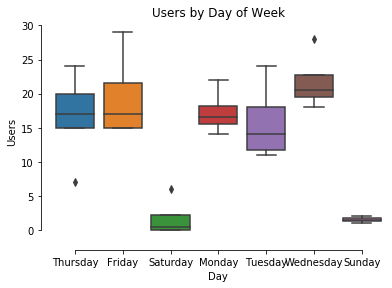

<Figure size 1152x432 with 0 Axes>

In [146]:
ax = sns.boxplot(x='Day',y='Users', data=users_df)  
plt.title('Users by Day of Week')
sns.despine(offset=10, trim=True)
ax.set(xlabel='Day', ylabel='Users')
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
plt.figure(figsize=(16, 6))